# Projet de Machine Learning
## Fake News Detection

## Mise en place

Importation des différentes librairies requises

In [1]:
# Librairie a installer
# """ Commenter cette ligne pour installer
!python -m pip install --upgrade pip
!pip install langdetect 
!pip install contractions
!pip install wordcloud==1.8.2.2
!pip install spacy
!pip install nltk

!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm
!python -m spacy download fr_core_news_sm
!python -m spacy download es_core_news_sm
!pip install spacy-language-detection
!pip install spacy_langdetect==0.1.1
!python -m spacy download fr_core_news_md


!pip install iso639
# """

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 61.6 MB/s eta 0:00:00


In [2]:
# Importation des différentes librairies utiles pour le notebook

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np 
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn import metrics


# librairies des classifiers utilisés
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from MyNLPUtilities import *

# librairies générales
import pickle 
from scipy.stats import randint
import string
import time
import base64
import re

import contractions

# librairie BeautifulSoup
from bs4 import BeautifulSoup

# librairie affichage
import wordcloud

## detection de language
import langdetect
from langdetect import detect

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download("stopwords")
from nltk import sent_tokenize
from nltk import RegexpParser
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn

import spacy
from spacy.tokens import Span
from spacy.lang.fr import French
from spacy_langdetect import LanguageDetector
from spacy.tokens import Doc
from spacy.language import Language
from spacy_language_detection import LanguageDetector

import iso639

import fr_core_news_md

TESTS = True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-04-22 21:25

Récupération du dataset

In [3]:
df=pd.read_csv('HAI817_Projet_test.csv')

# Pré-traitement

### Récupértion des titres et des textes

Copier du dataframe pour le pré-traitement

In [4]:
dfPret = df.copy()
#display(dfPret)

Recuperer les titres et les textes

In [5]:
titres = dfPret["title"]
textes = dfPret["text"]
ratings = dfPret['our rating']

print ("Nombre d'occurrences par classe :")
print(dfPret['our rating'].value_counts())
print ("Shape: " + str(dfPret.shape))

Nombre d'occurrences par classe :
false      315
true       210
mixture     56
other       31
Name: our rating, dtype: int64
Shape: (612, 4)


Suppression des caractères spéciaux

In [6]:
for i in range(len(titres)):
    # suppression des caractères spéciaux
    sentence_titre = re.sub(r"[^\w\s]", " ", str(titres[i]))
    sentence_texte = re.sub(r"[^\w\s]", " ", str(textes[i]))
    titres[i] = sentence_titre
    textes[i] = sentence_texte

# display(titres)
# display(textes)

### Détection des langues

Traitement de la première phrase en utilisant spacy

In [7]:
# spacy.load('fr_core_news_sm')

In [8]:
"""
#traitement de la première phrase
nlp = spacy.load("en_core_web_sm")
first_sentence=nlp(titres[610])

# [:=;][oO\-\*\^]?[D\)\]\(\/\\OpP]

for token in first_sentence:
    # l'objet token contient différents attributs
    print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}\t{8}".format(
        token.text, # text
        token.idx, # index du mot
        token.lemma_, # ca forme générique
        token.is_punct, # si c'est une ponctuation
        token.is_space, # si c'est un espace
        token.shape_, # la forme avec X en maj et x en min
        token.pos_, # categorie
        token.tag_, # tag associé
        token.ent_type_ # quel entité nommé 
    ))
"""


'\n#traitement de la première phrase\nnlp = spacy.load("en_core_web_sm")\nfirst_sentence=nlp(titres[610])\n\n# [:=;][oO\\-\\*\\^]?[D\\)\\]\\(\\/\\OpP]\n\nfor token in first_sentence:\n    # l\'objet token contient différents attributs\n    print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}\t{8}".format(\n        token.text, # text\n        token.idx, # index du mot\n        token.lemma_, # ca forme générique\n        token.is_punct, # si c\'est une ponctuation\n        token.is_space, # si c\'est un espace\n        token.shape_, # la forme avec X en maj et x en min\n        token.pos_, # categorie\n        token.tag_, # tag associé\n        token.ent_type_ # quel entité nommé \n    ))\n'

Retirer les articles qui ne sont pas en anglais

In [9]:
nlp = spacy.load("en_core_web_sm")

tab_langue_textes = []
for txt in textes:
    tab_langue_textes.append(langdetect.detect(txt))

def get_lang_detector(nlp, name):
    return LanguageDetector(seed=42)

for i, lang_text in enumerate(tab_langue_textes):
    if lang_text != 'en' :
        print("texte :",lang_text, "//" , textes[i][:50])
        textes.pop(i)
        titres.pop(i)
        ratings.pop(i)

texte : ru // https   ria ru 20210805 bikantov 1744527992 html  


Tokenisation sur les titres

In [10]:
word_tokens_list_titres = []
for tit in titres:
    # tokenisation
    word_tokens = word_tokenize(tit)
    word_tokens_list_titres.append(word_tokens)

print(word_tokens_list_titres[:2])

[['US', 'Treasury', 'deputy', 'sec', 'warns', 'that', 'shortages', 'likely', 'to', 'continue', 'until', 'EVERYONE', 'is', 'jabbed'], ['CNN', 'Praises', 'Taliban', 'For', 'Wearing', 'Masks', 'During', 'Attack']]


POS tagging : Attribuer à chaque mot un type

In [11]:
cate_word_tokens = []

for sentence in word_tokens_list_titres: # pour chaque phrase
    sentence_str = ' '.join(sentence) # join les elements avec un espace
    doc = nlp(sentence_str)
    pos_tags = [(token.text, token.pos_) for token in doc]
    cate_word_tokens.append(pos_tags)

# print("Liste des phrases : ", word_tokens_list_titres[0])
# print("Liste des correspondances de type : ", cate_word_tokens[0])

Filtrer les tokens qui ne rentrent pas dans les catégories voulues

In [12]:
selective_pos = ["PROPN", "NOUN", "VERB", "ADJ", "ADV", "PRON"]

print("Tokens conservés de catégorie", " ou ".join(selective_pos))

filter_cate_word = []
for phrase in cate_word_tokens:
    tab_courant = []
    for word in phrase:
        if word[1] in selective_pos:
            tab_courant.append(word)
    filter_cate_word.append(tab_courant)

print(filter_cate_word[0])

Tokens conservés de catégorie PROPN ou NOUN ou VERB ou ADJ ou ADV ou PRON
[('US', 'PROPN'), ('Treasury', 'PROPN'), ('deputy', 'NOUN'), ('sec', 'PROPN'), ('warns', 'VERB'), ('shortages', 'NOUN'), ('likely', 'ADJ'), ('continue', 'VERB'), ('EVERYONE', 'PRON'), ('jabbed', 'VERB')]


Suppression des majuscules sauf pour les nom propres

In [13]:
min_filter_cate = []
for phrase in filter_cate_word:
    mots_minuscules = []
    first_word = True
    for word in phrase:
        if word[1] == "PROPN" or first_word:
            first_word = False
            mots_minuscules.append(word[0])
        else:
            mots_minuscules.append(word[0].lower())
    min_filter_cate.append(mots_minuscules)

print(min_filter_cate[0])

['US', 'Treasury', 'deputy', 'sec', 'warns', 'shortages', 'likely', 'continue', 'everyone', 'jabbed']


Lemmatisation : retour a la forme de lemme

In [14]:
lemmatizer=WordNetLemmatizer()

lemmas_final_word = []
for phrase in min_filter_cate :
    doc_lemme = nlp(" ".join(phrase))
    print(doc_lemme)
    lemmas_courant = []
    for token in doc_lemme :
        if '-' in token.text: # vérifier si le token est un mot composé
            lemmas_courant.append(token.text) # ajouter le mot composé tel quel
        else:
            lemmas_courant.append(token.lemma_) # ajout a la liste en lematisant le mot
    lemmas_final_word.append(lemmas_courant) # ajout a la grande liste
    break

print(lemmas_final_word[0])

US Treasury deputy sec warns shortages likely continue everyone jabbed
['US', 'Treasury', 'deputy', 'sec', 'warn', 'shortage', 'likely', 'continue', 'everyone', 'jab']


Suppresion des stop words

In [15]:
# Affichage de la liste des stops words
the_stopwords = set(stopwords.words("english"))
if TESTS:
    print(the_stopwords)

# Supression
final_list_sentence_titre = []
print_first_one = True
for word_tokens in lemmas_final_word:
    if print_first_one:
        print("   Avant suppression des stopwords : ")
        print(word_tokens)
    tokens = [word for word in word_tokens if word not in the_stopwords]
    if print_first_one:
        print("   Après suppression des stopwords : ")
        print(tokens)
        print_first_one = False
    sentence = " ".join(tokens)
    final_list_sentence_titre.append(sentence)

print(final_list_sentence_titre[0])


{"she's", 'can', 'does', 'no', 'own', "shan't", 'their', 'this', "wouldn't", "shouldn't", 'out', 'couldn', 'during', 'more', 'these', 'll', 'before', 've', 'because', 'each', 'ours', 'being', 'again', 'm', 'how', 'himself', 'about', "mightn't", 'most', 'for', 'am', 'by', 'do', 'a', 'is', 'from', 'should', 'some', "it's", 'whom', 'are', 'them', "wasn't", 'our', 'aren', 'herself', 'it', "hasn't", 'when', 'up', 'very', 'only', 'in', "mustn't", 'and', 'shouldn', 'were', "you've", 'against', 'nor', 't', 'with', 'both', 'her', "you'll", 'ma', 'we', 'just', "isn't", 'any', 'there', 'was', 'or', 'of', 'once', 'hasn', 'not', 'as', 'y', 'if', "needn't", 'don', 'between', "you're", 'wouldn', 'he', 're', 'isn', 'wasn', 'themselves', 'too', 'those', 'few', "that'll", "don't", 'now', "won't", 'my', 'while', "weren't", 'mustn', 'his', "haven't", 'at', 'than', 'above', 'd', "should've", 'theirs', "hadn't", 'doesn', 'its', 'who', 'an', 'to', 'been', 'hadn', 'ain', 'your', 'having', 'they', 'that', 'hav

### Tout pareil pour les textes

Detection de la langue et des mots les plus courants

 Le document ' P ' est en   tl


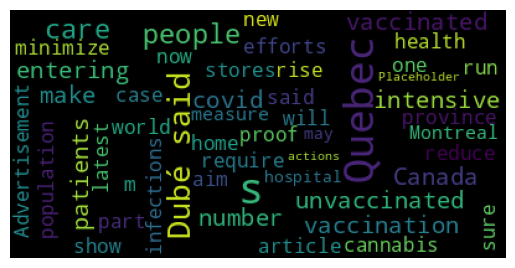

In [16]:
## detection de language

for text in textes :

    # affichage des word clouds
    wc = wordcloud.WordCloud(background_color='black', max_words=50, max_font_size=35)
    wc = wc.generate(str(text))
    fig = plt.figure(num=1)
    plt.axis('off')
    plt.imshow(wc, cmap=None)
    #plt.show()


print(" Le document '", text[0], "' est en  ", langdetect.detect(text[0]))

Tokénisation sur les textes

In [17]:
word_tokens_list_text = []
for txt in textes:
    # tokenisation
    word_tokens = word_tokenize(txt)
    #print("Premiers tokens après nettoyage des données ", word_tokens)
    word_tokens_list_text.append(word_tokens)

print(word_tokens_list_text[0]) # trop long

['The', 'deputy', 'secretary', 'at', 'the', 'US', 'Treasury', 'has', 'said', 'that', 'the', 'only', 'way', 'to', 'end', 'the', 'plague', 'of', 'empty', 'shelves', 'and', 'high', 'prices', 'around', 'the', 'country', 'is', 'for', 'every', 'person', 'in', 'the', 'world', 'to', 'be', 'vaccinated', 'In', 'an', 'interview', 'to', 'ABC', 'on', 'Thursday', 'Wally', 'Adeyemo', 'the', 'Biden', 'administration', 's', 'second', 'highest', 'official', 'in', 'the', 'Treasury', 'Department', 'has', 'commented', 'on', 'the', 'ongoing', 'shortages', 'of', 'consumer', 'goods', 'that', 'have', 'led', 'many', 'to', 'mock', 'the', 'president', 'as', 'Empty', 'Shelves', 'Joe', 'Despite', 'viral', 'photos', 'depicting', 'thousands', 'of', 'cargo', 'ships', 'lined', 'up', 'at', 'the', 'Port', 'of', 'Los', 'Angeles', 'ready', 'to', 'unload', 'their', 'goods', 'Adeyemo', 'claimed', 'that', 'the', 'supply', 'chain', 'issues', 'plaguing', 'so', 'many', 'US', 'retailers', 'are', 'an', 'international', 'issue', 'a

POS tagging : Ajouter un type

In [18]:
import spacy

nlp = spacy.load('en_core_web_sm')

cate_word_tokens_text = []

for sentence in word_tokens_list_text: # pour chaque phrase
    sentence_str = ' '.join(sentence) # join les elements avec un espace
    doc = nlp(sentence_str)
    pos_tags = [(token.text, token.pos_) for token in doc]
    cate_word_tokens_text.append(pos_tags)

print("Tokens conservés de catégorie PROPN ou NOUN ou VERB ou ADJ ou ADV ou PRON :")
print("Liste du texte 3 : ", word_tokens_list_text[2])
print("Liste des correspondances de type pour le texte 3 : ", cate_word_tokens_text[2])


Tokens conservés de catégorie PROPN ou NOUN ou VERB ou ADJ ou ADV ou PRON :
Liste du texte 3 :  ['The', 'vast', 'majority', 'of', 'oblivious', 'Americans', 'have', 'dismissed', 'all', 'this', 'as', 'a', 'conspiracy', 'theory', 'and', 'now', 'they', 're', 'shocked', 'and', 'frightened', 'by', 'the', 'realization', 'that', 'covid', 'internment', 'camps', 'are', 'being', 'actively', 'deployed', 'across', 'America', 'On', 'Friday', 'Tennessee', 'Gov', 'Bill', 'Lee', 'signed', 'Executive', 'Order', '83', 'which', 'authorizes', 'National', 'Guard', 'and', 'State', 'Guard', 'troops', 'to', 'break', 'into', 'peoples', 'homes', 'kidnap', 'them', 'at', 'gunpoint', 'and', 'take', 'them', 'to', 'covid', 'internment', 'camps', 'all', 'without', 'any', 'due', 'process', 'or', 'respect', 'for', 'civil', 'rights', 'Individuals', 'can', 'be', 'targeted', 'for', 'this', 'medical', 'kidnapping', 'by', 'armed', 'troops', 'via', 'telephone', 'assessments', 'and', 'the', 'medical', 'kidnapping', 'of', 'Amer

Filtrer les mots qui ne sont pas dans la bonne catégorie

In [19]:
filter_cate_word_text = []
selective_pos = ['PROPN', 'NOUN', 'VERB', 'ADJ', 'ADV', 'PRON']
for phrase in cate_word_tokens_text :
  tab_courant = []
  for word in phrase :
    if word[1] in selective_pos :
      tab_courant.append(word)
  filter_cate_word_text.append(tab_courant)
print(filter_cate_word_text[2])

[('vast', 'ADJ'), ('majority', 'NOUN'), ('oblivious', 'ADJ'), ('Americans', 'PROPN'), ('dismissed', 'VERB'), ('this', 'PRON'), ('conspiracy', 'NOUN'), ('theory', 'NOUN'), ('now', 'ADV'), ('they', 'PRON'), ('shocked', 'VERB'), ('frightened', 'VERB'), ('realization', 'NOUN'), ('covid', 'ADJ'), ('internment', 'NOUN'), ('camps', 'NOUN'), ('actively', 'ADV'), ('deployed', 'VERB'), ('America', 'PROPN'), ('Friday', 'PROPN'), ('Tennessee', 'PROPN'), ('Gov', 'PROPN'), ('Bill', 'PROPN'), ('Lee', 'PROPN'), ('signed', 'VERB'), ('Executive', 'PROPN'), ('Order', 'PROPN'), ('which', 'PRON'), ('authorizes', 'VERB'), ('National', 'PROPN'), ('Guard', 'PROPN'), ('State', 'PROPN'), ('Guard', 'PROPN'), ('troops', 'NOUN'), ('break', 'VERB'), ('peoples', 'NOUN'), ('homes', 'NOUN'), ('kidnap', 'VERB'), ('them', 'PRON'), ('gunpoint', 'NOUN'), ('take', 'VERB'), ('them', 'PRON'), ('covid', 'ADJ'), ('internment', 'NOUN'), ('camps', 'NOUN'), ('all', 'ADV'), ('due', 'ADJ'), ('process', 'NOUN'), ('respect', 'NOUN'),

Suppresion des majuscules sauf si c'est un nom propre

In [20]:
min_filter_cate_text = []
for phrase in filter_cate_word_text :
    #Mettre en minuscule
    mots_minuscules = []
    for word in phrase :
      if word[1] != 'PROPN':
          mots_minuscules.append(word[0].lower())
      else:
          mots_minuscules.append(word[0])
    min_filter_cate_text.append(mots_minuscules)
print(min_filter_cate_text[2])

['vast', 'majority', 'oblivious', 'Americans', 'dismissed', 'this', 'conspiracy', 'theory', 'now', 'they', 'shocked', 'frightened', 'realization', 'covid', 'internment', 'camps', 'actively', 'deployed', 'America', 'Friday', 'Tennessee', 'Gov', 'Bill', 'Lee', 'signed', 'Executive', 'Order', 'which', 'authorizes', 'National', 'Guard', 'State', 'Guard', 'troops', 'break', 'peoples', 'homes', 'kidnap', 'them', 'gunpoint', 'take', 'them', 'covid', 'internment', 'camps', 'all', 'due', 'process', 'respect', 'civil', 'rights', 'individuals', 'targeted', 'medical', 'kidnapping', 'armed', 'troops', 'telephone', 'assessments', 'medical', 'kidnapping', 'american', 'citizens', 'labeled', 'involuntary', 'commitment', 'temporary', 'quarantine', 'isolation', 'facilities', 'other', 'words', 'FEMA', 'style', 'concentration', 'camps', 'here', 'covid', 'excuse', 'mass', 'arrests', 'executions', 'Americans', 'Tennessee', 'EO', 'top', 'CDC', 'announcement', 'covid', 'camps', 'set', 'nationwide', 'basis', 'p

Lemmatisation : mettre sous forme de lemme

In [21]:
import nltk
nltk.download('omw-1.4')
lemmatizer=WordNetLemmatizer()

lemmas_final_word_text = []
for phrase in min_filter_cate_text :
  doc_lemme = nlp(" ".join(phrase)) # joindre avec un espace
  lemmas_courant = []
  for token in doc_lemme :
    if token.text.endswith('-'): continue # enleve les mots composé avec un tiret
    lemmas_courant.append(lemmatizer.lemmatize(token.text)) # ajout a la liste en lematisant le mot
  lemmas_final_word_text.append(lemmas_courant) # ajout a la grande liste
print(lemmas_final_word_text[2])

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
['vast', 'majority', 'oblivious', 'Americans', 'dismissed', 'this', 'conspiracy', 'theory', 'now', 'they', 'shocked', 'frightened', 'realization', 'covid', 'internment', 'camp', 'actively', 'deployed', 'America', 'Friday', 'Tennessee', 'Gov', 'Bill', 'Lee', 'signed', 'Executive', 'Order', 'which', 'authorizes', 'National', 'Guard', 'State', 'Guard', 'troop', 'break', 'people', 'home', 'kidnap', 'them', 'gunpoint', 'take', 'them', 'covid', 'internment', 'camp', 'all', 'due', 'process', 'respect', 'civil', 'right', 'individual', 'targeted', 'medical', 'kidnapping', 'armed', 'troop', 'telephone', 'assessment', 'medical', 'kidnapping', 'american', 'citizen', 'labeled', 'involuntary', 'commitment', 'temporary', 'quarantine', 'isolation', 'facility', 'other', 'word', 'FEMA', 'style', 'concentration', 'camp', 'here', 'covid', 'excuse', 'mass', 'arrest', 'execution', 'Americans', 

Suppression des stops words

In [22]:
# Affichage de la liste des stops words
nltk.download("stopwords")
from nltk.corpus import stopwords
the_stopwords=set(stopwords.words("english"))
print (the_stopwords)

{"she's", 'can', 'does', 'no', 'own', "shan't", 'their', 'this', "wouldn't", "shouldn't", 'out', 'couldn', 'during', 'more', 'these', 'll', 'before', 've', 'because', 'each', 'ours', 'being', 'again', 'm', 'how', 'himself', 'about', "mightn't", 'most', 'for', 'am', 'by', 'do', 'a', 'is', 'from', 'should', 'some', "it's", 'whom', 'are', 'them', "wasn't", 'our', 'aren', 'herself', 'it', "hasn't", 'when', 'up', 'very', 'only', 'in', "mustn't", 'and', 'shouldn', 'were', "you've", 'against', 'nor', 't', 'with', 'both', 'her', "you'll", 'ma', 'we', 'just', "isn't", 'any', 'there', 'was', 'or', 'of', 'once', 'hasn', 'not', 'as', 'y', 'if', "needn't", 'don', 'between', "you're", 'wouldn', 'he', 're', 'isn', 'wasn', 'themselves', 'too', 'those', 'few', "that'll", "don't", 'now', "won't", 'my', 'while', "weren't", 'mustn', 'his', "haven't", 'at', 'than', 'above', 'd', "should've", 'theirs', "hadn't", 'doesn', 'its', 'who', 'an', 'to', 'been', 'hadn', 'ain', 'your', 'having', 'they', 'that', 'hav

In [23]:
# Supression
final_list_sentence_text = []
for word_tokens in lemmas_final_word_text :
    #print ("   Avant suppression des stopwords : ")
    #print (word_tokens)
    tokens=[word for word in word_tokens if word not in the_stopwords]
    #print ("   Après suppression des stopwords : ")
    #print (tokens)
    #print("\n\n")
    sentence = ' '.join(tokens)
    final_list_sentence_text.append(sentence)

print(final_list_sentence_text)

Mexico country spoke fewer woman men deported primarily constitute smaller proportion deportee according statistic obtained public information request El Salvador General Directorate Migration Foreigners DGME woman constituted percent individual deported United States annually chose conduct interview child parent present therefore missed important component experience related parent household domestic violence neglect Human Rights Watch carried interview Spanish English interpreter depending preference interviewee conducted handful interview US interview El Salvador voice video call conducted interview person Human Rights Watch informed interviewee purpose interview voluntary nature way information collected used interviewer assured participant end interview time decline answer question negative consequence interviewee provided verbal informed consent participate appropriate Human Rights Watch provided contact information organization offering counseling health legal social service ini

### Automatisation des pré-traitement

Définir les fonctions

In [69]:
# 1. Generation de wordclouds
def generate_wordcloud(texts):
    for text in texts:
        # Detection de la langue
        lang = detect(text)

        # Affichage des word clouds
        wc = wordcloud.WordCloud(
            background_color="black", max_words=100, max_font_size=35
        )
        wc = wc.generate(str(text))
        fig = plt.figure(num=1)
        plt.axis("off")
        plt.imshow(wc, cmap=None)
        plt.title(f"Langue: {lang}")
        plt.show()


# 2. Mettre sous forme de token
def tokenize_titles(texts):
    word_tokens_list_texts = []
    for txt in texts:
        # tokenisation
        word_tokens = word_tokenize(txt)
        word_tokens_list_texts.append(word_tokens)
    return word_tokens_list_texts


# 3. Donner la categorie des mots
def get_pos_tags(word_tokens_list):
    nlp = spacy.load("en_core_web_sm")
    cate_word_tokens = []
    for sentence in word_tokens_list:
        sentence_str = " ".join(sentence)
        doc = nlp(sentence_str)
        pos_tags = [
            (token.text, token.pos_)
            for token in doc
            if token.pos_ in ["PROPN", "NOUN", "VERB", "ADJ", "ADV", "PRON"]
        ]
        cate_word_tokens.append(pos_tags)
    return cate_word_tokens


# 4. Filtrer les mots en focntion de leurs types selective_pos
def filter_by_pos(text, selective_pos):
    """
    - text (list): une liste de phrases où chaque phrase est une liste de mots.
    - selective_pos (list): une liste de catégories grammaticales à conserver.
            Exemple : ['PROPN', 'NOUN', 'VERB', 'ADJ', 'ADV', 'PRON']
    """
    filter_cate_word_text = []
    for phrase in text:
        tab_courant = []
        for word in phrase:
            if word[1] in selective_pos:
                tab_courant.append(word)
        filter_cate_word_text.append(tab_courant)
    return filter_cate_word_text


# 5. Suppression des majuscule sur les mots qui ne sont pas des nom propre
def lowercase_filter(filter_cate_word_text):
    min_filter_cate_text = []
    for phrase in filter_cate_word_text:
        mots_minuscules = []
        for word in phrase:
            if word[1] != "PROPN":
                mots_minuscules.append(word[0].lower())
            else:
                mots_minuscules.append(word[0])
        min_filter_cate_text.append(mots_minuscules)
    return min_filter_cate_text


# 6. Supprimer les stop words
def remove_stopwords(text):

    # Chargement de la liste de stopwords
    the_stopwords = set(stopwords.words("english"))

    # Tokenisation des phrases
    word_tokens_list = []
    for sentence in text:
        word_tokens_list.append(word_tokenize(" ".join(sentence)))

    # Suppression des stopwords et join des tokens
    final_list_sentence = []
    for word_tokens in word_tokens_list:
        tokens = [word for word in word_tokens if word not in the_stopwords]
        sentence = " ".join(tokens)
        final_list_sentence.append(sentence)

    return final_list_sentence


# 7. Lemmatisation des mots
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmas_final_word_text = []
    for phrase in text:
        doc_lemme = nlp(" ".join(phrase))
        lemmas_courant = []
        for token in doc_lemme:
            if token.text.endswith("-"):
                continue  # enleve les mots composé avec un tiret
            lemmas_courant.append(lemmatizer.lemmatize(token.text))  # ajout a la liste en lematisant le mot
        lemmas_final_word_text.append(" ".join(lemmas_courant))  # ajout a la grande liste
    return lemmas_final_word_text


#### Création de la fonction pour le pré-traitement

In [67]:
def preTraitement(
    texte,
    selective_pos=[],
    filter_cate=False,
    supp_maj=False,
    supp_stopwords=False,
    lemmatisation=False
    ):

    # generate_wordcloud(texte)
    tab_texte = tokenize_titles(texte)
    tab_texte = get_pos_tags(tab_texte)

    if filter_cate:
        tab_texte = filter_by_pos(tab_texte, selective_pos)  # filtre en focntion de selective_pos

    if supp_maj:
        tab_texte = lowercase_filter(tab_texte)  # Mise en minuscule

    if supp_stopwords:
        tab_texte = remove_stopwords(tab_texte)  # supprime les stop-words

    if lemmatisation:
        tab_texte = lemmatize_text(tab_texte)  # met sous forme de lemme

    return tab_texte

# " Faire en sorte que chaque sortie de fonction soit un tableau de string et pas un tableau de tableau"

Pipeline de chaque paramètre

# Traitement

## Normalisation

 text normalizer (le prof qui a dit ca mdr)
#QUESTION : Comment on utilise les n-gramme pour la classification sachant que pour les autres pretraitement on avait un tableu de chaque mots qu'on pouvait join pour avoir un texte ?
# Il a dit que on applique les ngrammes dans le tfidf directement, en calculant le tfidf il y a un parametre pour dire que je veux le tfidf avec les ngramme
# il va calculer lui même tous les n-gramme et on applique le classification sur le tfidf
# on peut uiliser textNormalizer

### Formatage du jeu de données

In [70]:
# Récupération des variables

Xtitle = preTraitement(dfPret["title"], 
                        selective_pos=['NOUN', 'VERB', 'ADJ'],
                        filter_cate=True,
                        supp_maj=True,
                        supp_stopwords=True,
                        lemmatisation=True)

Xtext = preTraitement(dfPret["text"], 
                        selective_pos=['NOUN', 'VERB', 'ADJ'],
                        filter_cate=True,
                        supp_maj=True,
                        supp_stopwords=True,
                        lemmatisation=True)

#Concaténation du texte à traiter
X = Xtext + Xtitle

#Variable de prédiction
y = dfPret["our rating"]

### Transformation du dataset

In [71]:
# list_titre = final_list_sentence_text
texteTest = ["This is an example of TfidfVectorizer for creating a vector",
        "This is another example of TfidfVectorizer",
        "with or without parameters"]

print ("Application de TfidfVectorizer :")
vectorizer = TfidfVectorizer()
# fit et transform en une opération
X = vectorizer.fit_transform(texteTest)
print(vectorizer.get_feature_names())

# Creation du dataframe pour affichage
dfAffichage = pd.DataFrame(
    data=vectorizer.transform(texteTest).toarray(),
    columns=vectorizer.get_feature_names_out()
)

# on et censé enlever les mots qui sont trop present dans les texte pcq aucun interet de les garder pour savoir si c'est une fake news ou pas
# vérifier si chaque valeur dans chaque colonne est supérieure à 0.10
# Calculer le nombre de documents où chaque mot apparaît
doc_freq = (dfAffichage > 0.1).sum(axis=0)

# Filtrer les colonnes correspondantes
cols = dfAffichage.columns[doc_freq >= 110]

print(cols)


#display(dfAffichage)

Application de TfidfVectorizer :
['an', 'another', 'creating', 'example', 'for', 'is', 'of', 'or', 'parameters', 'tfidfvectorizer', 'this', 'vector', 'with', 'without']
Index([], dtype='object')


### Visualisation des valeurs manquantes

On regarde si il y a des valeurs manquantes dans le fichier

<AxesSubplot: >

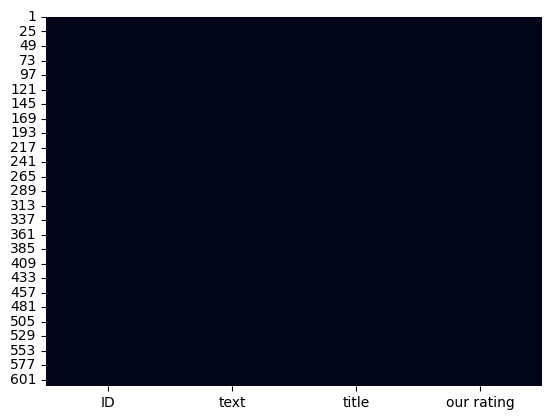

In [72]:
sns.heatmap(dfPret.isnull(), cbar=False)

On voit qu'il n'y a pas de valeurs manquantes donc on a pas de traitements sur les valeurs manquantes a faire

# Classification

### Création du jeu d'apprentissage

In [73]:
# Transformation du texte en données utilisables par les classifieurs
print(X)
tf = TfidfVectorizer()
X_transformed = tf.fit_transform(X).toarray()

# Séparation du jeu de données
trainsize = 0.8
testsize = 0.2
seed = 30

X_train, X_test, y_train, y_test = train_test_split(X_transformed, 
                                                    y, 
                                                    train_size=trainsize, 
                                                    random_state=seed, 
                                                    test_size=testsize)

  (0, 11)	0.3809144530718344
  (0, 2)	0.3809144530718344
  (0, 4)	0.3809144530718344
  (0, 9)	0.28969525980379496
  (0, 6)	0.28969525980379496
  (0, 3)	0.28969525980379496
  (0, 0)	0.3809144530718344
  (0, 5)	0.28969525980379496
  (0, 10)	0.28969525980379496
  (1, 1)	0.5068900148458076
  (1, 9)	0.38550292161010064
  (1, 6)	0.38550292161010064
  (1, 3)	0.38550292161010064
  (1, 5)	0.38550292161010064
  (1, 10)	0.38550292161010064
  (2, 8)	0.5
  (2, 13)	0.5
  (2, 7)	0.5
  (2, 12)	0.5


AttributeError: lower not found

### Comparaison des classifieurs

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection

models = []
models.append(('MultinomialNB',MultinomialNB()))
models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))


seed = 7
results = []
names = []
scoring='accuracy'

for name,model in models:
    print("╔"+10*"═"+len(name)*"═"+10*"═"+"╗")
    print("║"+10*" "+name+ " "*10 + "║")
    print("╚"+10*"═"+len(name)*"═"+10*"═"+"╝")
    clf = model
    clf.fit(X_train, y_train)
    result = clf.predict(X_test)

    y_pred = clf.predict(X_test)
    MyshowAllScores(y_test,y_pred)

### Accuracy

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

score = 'accuracy'
allresults = []
results = []
names = []

for name,model in models:
 # cross validation en 10 fois
 kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

 print ("Evaluation de ",name)
 start_time = time.time()

 # application de la classification
 cv_results = cross_val_score(model, X_transformed, y, cv=kfold, scoring=score)

 thetime=time.time() - start_time
 result=Result(name,cv_results.mean(),cv_results.std(),thetime)
 allresults.append(result)

 # pour affichage
 results.append(cv_results)
 names.append(name)

allresults=sorted(allresults, key=lambda result: result.scoremean, reverse=True)

 # affichage résultats

print ('\n Tous les résultats :')
for result in allresults:
 print ('Classifier : ',result.name,
 ' %s : %0.3f' %(score,result.scoremean),
 ' (%0.3f)'%result.stdresult,
 ' en %0.3f '%result.timespent,' s')

print ('\nLe meilleur resultat : ')
best_accuracy = allresults[0]
print ('Classifier : ',allresults[0].name, ' %s : %0.3f' %(score,allresults[0].scoremean),
       ' (%0.3f)'%allresults[0].stdresult, ' en %0.3f '%allresults[0].timespent,' s\n')

### Comparaison des classifieurs en fonction de l'accuracy

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('Comparaison des classifieurs en fonction de accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

### Recall

In [0]:
score = 'recall'
allresults = []
results = []
names = []

for name,model in models:
 # cross validation en 10 fois
 kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

 print ("Evaluation de ",name)
 start_time = time.time()

 # application de la classification
 cv_results = cross_val_score(model, X_transformed, y, cv=kfold, scoring=score)

 thetime=time.time() - start_time
 result=Result(name,cv_results.mean(),cv_results.std(),thetime)
 allresults.append(result)
 # pour affichage
 results.append(cv_results)
 names.append(name)

allresults=sorted(allresults, key=lambda result: result.scoremean, reverse=True)

 # affichage des résultats

print ('\nTous les résultats :')
for result in allresults:
 print ('Classifier : ',result.name,
 ' %s : %0.3f' %(score,result.scoremean),
 ' (%0.3f)'%result.stdresult,
 ' en %0.3f '%result.timespent,' s')

print ('\nLe meilleur resultat : ')
best_recall = allresults[0]
print ('Classifier : ',allresults[0].name, ' %s : %0.3f' %(score,allresults[0].scoremean), 
       ' (%0.3f)'%allresults[0].stdresult, ' en %0.3f '%allresults[0].timespent,' s\n')

### Comparaison des classifieurs en fonction du recall

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('Comparaison des classifieurs en fonction de recall')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

### Etude du meilleur classifieur

In [0]:
params = {
 'GaussianNB' :
    [{'var_smoothing': np.logspace(0,-9, num=100)}],

 'RF':[{'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}],

 'LR' : [{'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }],

  'CART' : [{'max_depth': [2, 3, 5, 10, 21],
    'min_samples_leaf': [5, 10,16 ,20, 50, 100],
    'criterion': ["gini", "entropy"]}],

  'SVM' : [{'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}],

  'KNN' : [{ 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}],

  'MultinomialNB' : [{
    'alpha': np.linspace(0.5, 1.5, 6),
    'fit_prior': [True, False]}]
}

params_lite = {
    'GaussianNB' :
        [{'var_smoothing': np.logspace(0,-9, num=100)}],

    'RF':[{'n_estimators': [4, 6, 9],
           'max_features': ['log2', 'sqrt','auto'],
           'criterion': ['entropy', 'gini'],
           'max_depth': [2, 3, 5, 10],
           'min_samples_split': [2, 3, 5],
           'min_samples_leaf': [1,5,8]
           }],

    'LR' : [{'C' : [0.001,0.01,0.1,1,10,100]}],

    'CART' : [{'max_depth': [1,2,3,4,5,6,7,8,9,10],
               'criterion': ['gini', 'entropy'],
               'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}],

    'SVM' : [{'C': [0.001, 0.01, 0.1, 1, 10],
              'gamma' : [0.001, 0.01, 0.1, 1],
              'kernel': ['linear','rbf']}],

    'KNN' : [{ 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}],

    'MultinomialNB' : [{
        'alpha': np.linspace(0.5, 1.5, 6),
        'fit_prior': [True, False]}]
}

from sklearn.model_selection import GridSearchCV

print("*--*--*--*--*--*--*--*--*--*--* "+len(best_accuracy.name)*" " +" *--*--*--*--*--*--*--*--*--*--*")
print("*--*--*--*--*--*--*--*--*--*--* "+best_accuracy.name+" *--*--*--*--*--*--*--*--*--*--*")
print("*--*--*--*--*--*--*--*--*--*--* "+len(best_accuracy.name)*" " +" *--*--*--*--*--*--*--*--*--*--*")
for name,model in models:
    if best_accuracy.name == name:
        themodel = model
        theparams = params_lite[name]
gd_sr = GridSearchCV(estimator=themodel,
                     param_grid=theparams,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1,
                     return_train_score=True)

gd_sr.fit(X_train, y_train)

print ('Accuracy :')
print ('meilleur score ',gd_sr.best_score_,'\n')
print ('meilleurs paramètres', gd_sr.best_params_,'\n')
print ('meilleur estimateur',gd_sr.best_estimator_,'\n')

gd_sr = GridSearchCV(estimator=themodel,
                     param_grid=theparams,
                     scoring='recall',
                     cv=5,
                     n_jobs=-1,
                     return_train_score=True)

gd_sr.fit(X_train, y_train)

print ('Recall :')
print ('meilleur score ',gd_sr.best_score_,'\n')
print ('meilleurs paramètres', gd_sr.best_params_,'\n')
print ('meilleur estimateur',gd_sr.best_estimator_,'\n')

In [0]:
if best_accuracy.name != best_recall.name:
    print("*--*--*--*--*--*--*--*--*--*--* "+len(best_recall.name)*" " +" *--*--*--*--*--*--*--*--*--*--*")
    print("*--*--*--*--*--*--*--*--*--*--* "+best_recall.name+" *--*--*--*--*--*--*--*--*--*--*")
    print("*--*--*--*--*--*--*--*--*--*--* "+len(best_recall.name)*" " +" *--*--*--*--*--*--*--*--*--*--*")
    for name,model in models:
        if best_recall.name == name:
            themodel = model
            theparams = params_lite[name]

    gd_sr = GridSearchCV(estimator=themodel,
                         param_grid=theparams,
                         scoring='accuracy',
                         cv=5,
                         n_jobs=-1,
                         return_train_score=True)

    gd_sr.fit(X_train, y_train)

    print ('Accuracy :')
    print ('meilleur score ',gd_sr.best_score_,'\n')
    print ('meilleurs paramètres', gd_sr.best_params_,'\n')
    print ('meilleur estimateur',gd_sr.best_estimator_,'\n')

    gd_sr = GridSearchCV(estimator=themodel,
                         param_grid=theparams,
                         scoring='recall',
                         cv=5,
                         n_jobs=-1,
                         return_train_score=True)

    gd_sr.fit(X_train, y_train)

    print ('Recall :')
    print ('meilleur score ',gd_sr.best_score_,'\n')
    print ('meilleurs paramètres', gd_sr.best_params_,'\n')
    print ('meilleur estimateur',gd_sr.best_estimator_,'\n')

In [0]:
total_vrai = df.loc[df["our rating"] == "true"]
display(f"Nombre de lignes pour total_vrai : {total_vrai.shape[0]}")

total_faux = df.loc[df["our rating"] == "false"]
display(f"Nombre de lignes pour total_faux : {total_faux.shape[0]}")

total_vrai_ou_faux = df.loc[(df["our rating"] == "false") | (df["our rating"] == "true")]
display(f"Nombre de lignes pour total_vrai_ou_faux : {total_vrai_ou_faux.shape[0]}")

total_other = df.loc[df["our rating"] == "other"]
display(f"Nombre de lignes pour total_other : {total_other.shape[0]}")

total_mixte = df.loc[df["our rating"] == "mixture"]
display(f"Nombre de lignes pour total_mixture : {total_mixte.shape[0]}")

In [0]:
print ('Création du pipeline \n')
for name,model in models:
    if best_accuracy.name == name:
        pipeline = Pipeline([('scl', StandardScaler()), ('clf', model)])
        break

In [0]:
selective_pos_plrs=[['NOUN', 'VERB', 'ADJ'], ['NOUN', 'VERB', 'ADJ', 'PRON'], ['PROPN', 'NOUN', 'VERB', 'ADJ', 'ADV'], ['PROPN', 'NOUN', 'VERB', 'ADJ', 'ADV', 'PRON']]

# Liste de tous les pipeline avec tous les parametres quon peut mettre
# pipeline = Pipeline([('pipeline1', preTraitement(texte, filter_cate=True, selective_pos_plrs[0], supp_maj=False, supp_stopwords=False, lemmatisation=False)])

## Sinon : Boucles mdr 
# cpt = 0
# for fil in [True, False]:
#     for maj in [True, False]:
#         for stop in [True, False]:
#             for lem in [True, False]:
#                 for selec in selective_pos_plrs:
#                     cpt += 1
#                     pipeline = Pipeline([('pipeline'+str(cpt), 
#                                         preTraitement(texte, 
#                                                     filter_cate=fil, 
#                                                     selec, 
#                                                     supp_maj=maj, 
#                                                     supp_stopwords=stop, 
#                                                     lemmatisation=lem)])

# pipeline = Pipeline([('pipeline2', 
                    # preTraitement(texte, 
                    # filter_cate=True, 
                    # selective_pos_plrs[1], 
                    # supp_maj=False, 
                    # supp_stopwords=False, 
                    # lemmatisation=False)])
# pipeline = Pipeline([('pipeline3', preTraitement(texte, filter_cate=True, selective_pos_plrs[2], supp_maj=False, supp_stopwords=False, lemmatisation=False)])
# pipeline = Pipeline([('pipeline4', preTraitement(texte, filter_cate=True, selective_pos_plrs[3], supp_maj=False, supp_stopwords=False, lemmatisation=False)])

# pipeline = Pipeline([('pipeline5', preTraitement(texte, filter_cate=True, selective_pos_plrs[0], supp_maj=True, supp_stopwords=False, lemmatisation=False)])
# pipeline = Pipeline([('pipeline6', preTraitement(texte, filter_cate=True, selective_pos_plrs[1], supp_maj=True, supp_stopwords=False, lemmatisation=False)])
# pipeline = Pipeline([('pipeline7', preTraitement(texte, filter_cate=True, selective_pos_plrs[2], supp_maj=True, supp_stopwords=False, lemmatisation=False)])
# pipeline = Pipeline([('pipeline8', preTraitement(texte, filter_cate=True, selective_pos_plrs[3], supp_maj=True, supp_stopwords=False, lemmatisation=False)])

# pipeline = Pipeline([('pipeline9', preTraitement(texte, filter_cate=True, selective_pos_plrs[0], supp_maj=False, supp_stopwords=True, lemmatisation=False)])
# pipeline = Pipeline([('pipeline10', preTraitement(texte, filter_cate=True, selective_pos_plrs[1], supp_maj=False, supp_stopwords=True, lemmatisation=False)])
# pipeline = Pipeline([('pipeline11', preTraitement(texte, filter_cate=True, selective_pos_plrs[2], supp_maj=False, supp_stopwords=True, lemmatisation=False)])
# pipeline = Pipeline([('pipeline12', preTraitement(texte, filter_cate=True, selective_pos_plrs[3], supp_maj=False, supp_stopwords=True, lemmatisation=False)])

# pipeline = Pipeline([('pipeline13', preTraitement(texte, filter_cate=True, selective_pos_plrs[0], supp_maj=True, supp_stopwords=True, lemmatisation=False)])
# pipeline = Pipeline([('pipeline14', preTraitement(texte, filter_cate=True, selective_pos_plrs[1], supp_maj=True, supp_stopwords=True, lemmatisation=False)])
# pipeline = Pipeline([('pipeline15', preTraitement(texte, filter_cate=True, selective_pos_plrs[2], supp_maj=True, supp_stopwords=True, lemmatisation=False)])
# pipeline = Pipeline([('pipeline16', preTraitement(texte, filter_cate=True, selective_pos_plrs[3], supp_maj=True, supp_stopwords=True, lemmatisation=False)])

# pipeline = Pipeline([('pipeline17', preTraitement(texte, filter_cate=True, selective_pos_plrs[0], supp_maj=False, supp_stopwords=False, lemmatisation=True)])
# pipeline = Pipeline([('pipeline18', preTraitement(texte, filter_cate=True, selective_pos_plrs[1], supp_maj=False, supp_stopwords=False, lemmatisation=True)])
# pipeline = Pipeline([('pipeline19', preTraitement(texte, filter_cate=True, selective_pos_plrs[2], supp_maj=False, supp_stopwords=False, lemmatisation=True)])
# pipeline = Pipeline([('pipeline20', preTraitement(texte, filter_cate=True, selective_pos_plrs[3], supp_maj=False, supp_stopwords=False, lemmatisation=True)])

# pipeline = Pipeline([('pipeline21', preTraitement(texte, filter_cate=True, selective_pos_plrs[0], supp_maj=True, supp_stopwords=False, lemmatisation=True)])
# pipeline = Pipeline([('pipeline22', preTraitement(texte, filter_cate=True, selective_pos_plrs[1], supp_maj=True, supp_stopwords=False, lemmatisation=True)])
# pipeline = Pipeline([('pipeline23', preTraitement(texte, filter_cate=True, selective_pos_plrs[2], supp_maj=True, supp_stopwords=False, lemmatisation=True)])
# pipeline = Pipeline([('pipeline24', preTraitement(texte, filter_cate=True, selective_pos_plrs[3], supp_maj=True, supp_stopwords=False, lemmatisation=True)])

# pipeline = Pipeline([('pipeline25', preTraitement(texte, filter_cate=True, selective_pos_plrs[0], supp_maj=False, supp_stopwords=True, lemmatisation=True)])
# pipeline = Pipeline([('pipeline26', preTraitement(texte, filter_cate=True, selective_pos_plrs[1], supp_maj=False, supp_stopwords=True, lemmatisation=True)])
# pipeline = Pipeline([('pipeline27', preTraitement(texte, filter_cate=True, selective_pos_plrs[2], supp_maj=False, supp_stopwords=True, lemmatisation=True)])
# pipeline = Pipeline([('pipeline28', preTraitement(texte, filter_cate=True, selective_pos_plrs[3], supp_maj=False, supp_stopwords=True, lemmatisation=True)])

# pipeline = Pipeline([('pipeline29', preTraitement(texte, filter_cate=True, selective_pos_plrs[0], supp_maj=True, supp_stopwords=True, lemmatisation=True)])
# pipeline = Pipeline([('pipeline30', preTraitement(texte, filter_cate=True, selective_pos_plrs[1], supp_maj=True, supp_stopwords=True, lemmatisation=True)])
# pipeline = Pipeline([('pipeline31', preTraitement(texte, filter_cate=True, selective_pos_plrs[2], supp_maj=True, supp_stopwords=True, lemmatisation=True)])
# pipeline = Pipeline([('pipeline32', preTraitement(texte, filter_cate=True, selective_pos_plrs[3], supp_maj=True, supp_stopwords=True, lemmatisation=True)])


Existe-t'il des valeurs nulles ? Existe-til des valeurs manquantes ? Rappel vous pouvez le voir avec des histogrammes mais aussi avec une heatmap.  

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6a134416-3db7-46aa-b9d0-58394760078e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>